In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading mnist dataset

In [4]:
from tensorflow.keras.datasets import mnist

In [7]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [8]:
print("Shapes: ")
print("==============================")
print(f"{xtrain.shape=}")
print(f"{xtest.shape=}")
print(f"{ytrain.shape=}")
print(f"{ytest.shape=}")

Shapes: 
xtrain.shape=(60000, 28, 28)
xtest.shape=(10000, 28, 28)
ytrain.shape=(60000,)
ytest.shape=(10000,)


# Preprocessing

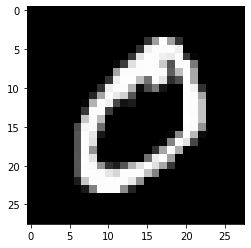

In [22]:
plt.imshow(xtrain[1],cmap="gist_gray")

In [21]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
from tensorflow.keras.utils import to_categorical

In [32]:
y_cat_train=to_categorical(ytrain,num_classes=10)

In [33]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [34]:
y_cat_test=to_categorical(ytest,num_classes=10)

In [35]:
xtrain[0].max()

255

In [36]:
xtrain[0].min()

0

In [40]:
xtrain=xtrain/255

In [41]:
xtest=xtest/255

In [42]:
print(xtrain[0].max())
print(xtest[0].max())

1.0
1.0


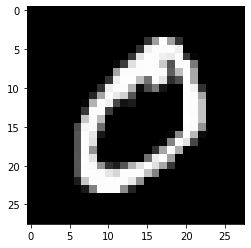

In [43]:
plt.imshow(xtrain[1],cmap="gist_gray")

In [44]:
xtrain=xtrain.reshape(60000, 28, 28, 1)
xtest=xtest.reshape(10000, 28, 28, 1)

# Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [46]:
model=Sequential()

In [48]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,"relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
es=EarlyStopping(patience=1)

In [51]:
model.fit(xtrain,y_cat_train,epochs=20,
          validation_data=(xtest,y_cat_test),callbacks=[es])

Epoch 1/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1348 - accuracy: 0.9595 - val_loss: 0.0617 - val_accuracy: 0.9795
Epoch 2/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0531 - val_accuracy: 0.9818
Epoch 3/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0391 - val_accuracy: 0.9884
Epoch 4/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0366 - val_accuracy: 0.9882
Epoch 5/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0407 - val_accuracy: 0.9879


# Evaluation

In [54]:
results=pd.DataFrame(model.history.history)

In [57]:
results

,loss,accuracy,val_loss,val_accuracy
0,0.134807,0.959450,0.061746,0.9795
1,0.046922,0.985433,0.053081,0.9818
2,0.029849,0.990800,0.039140,0.9884
3,0.020043,0.993533,0.036560,0.9882
4,0.015230,0.994883,0.040721,0.9879


<AxesSubplot:>

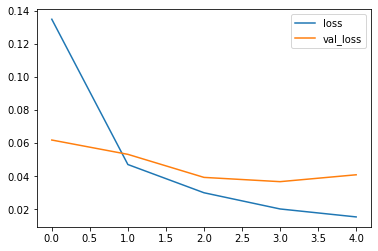

In [66]:
results[["loss","val_loss"]].plot()

<AxesSubplot:>

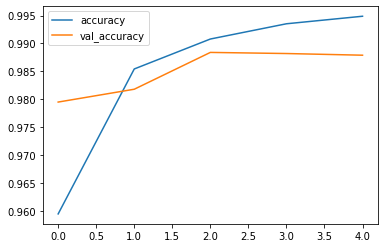

In [64]:
results[["accuracy","val_accuracy"]].plot()

In [67]:
model.evaluate(xtest,y_cat_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0407 - accuracy: 0.9879


[0.04072132706642151, 0.9879000186920166]

In [71]:
prediction=model.predict_classes(xtest)

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [68]:
from sklearn import metrics

In [72]:
metrics.confusion_matrix(prediction,ytest)

array([[ 973,    0,    1,    0,    0,    1,    7,    1,    3,    2],
       [   1, 1127,    1,    0,    0,    0,    2,    1,    0,    2],
       [   0,    5, 1026,    0,    1,    0,    0,    8,    1,    0],
       [   1,    1,    0, 1007,    0,    9,    1,    2,    7,    8],
       [   0,    0,    0,    0,  972,    0,    1,    1,    0,    2],
       [   2,    0,    0,    1,    0,  881,    1,    0,    1,    3],
       [   1,    2,    0,    0,    3,    1,  945,    0,    0,    0],
       [   0,    0,    3,    1,    0,    0,    0, 1008,    1,    4],
       [   2,    0,    1,    1,    1,    0,    1,    1,  954,    2],
       [   0,    0,    0,    0,    5,    0,    0,    6,    7,  986]],
      dtype=int64)

In [74]:
print(metrics.classification_report(prediction,ytest))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       988
           1       0.99      0.99      0.99      1134
           2       0.99      0.99      0.99      1041
           3       1.00      0.97      0.98      1036
           4       0.99      1.00      0.99       976
           5       0.99      0.99      0.99       889
           6       0.99      0.99      0.99       952
           7       0.98      0.99      0.99      1017
           8       0.98      0.99      0.99       963
           9       0.98      0.98      0.98      1004

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

